In [1]:
import pandas as pd
import numpy as np

In [2]:
from autoscraper import AutoScraper

In [3]:
imdb_url = 'https://www.imdb.com/list/ls050782187/'

In [84]:
wanted_list = ['The Godfather',
               'X ',
               '175 min',
               'Crime, Drama',
               '9.2',
               ' Francis Ford Coppola',
               '1,918,459',
               '$134.97M'
              ]

In [85]:
scrapper= AutoScraper()

In [86]:
result = scrapper.build(imdb_url, wanted_list)

print(result)

['The Godfather', 'The Silence of the Lambs', 'Star Wars: Episode V - The Empire Strikes Back', 'The Shawshank Redemption', 'The Shining', 'Casablanca', "One Flew Over the Cuckoo's Nest", 'Raiders of the Lost Ark', 'The Lord of the Rings: The Return of the King', 'Star Wars', 'The Dark Knight', 'The Godfather Part II', 'Aliens', "Schindler's List", 'Inception', 'The Lord of the Rings: The Fellowship of the Ring', 'Alien', 'Some Like It Hot', 'Blade Runner', 'Se7en', 'Apocalypse Now', '12 Angry Men', 'The Lord of the Rings: The Two Towers', 'Terminator 2: Judgment Day', 'Star Wars: Episode VI - Return of the Jedi', 'Die Hard', 'Gone with the Wind', 'Taxi Driver', 'Pulp Fiction', 'The Bridge on the River Kwai', 'The Lion King', 'North by Northwest', 'Rear Window', 'Léon', 'Back to the Future', 'Citizen Kane', 'GoodFellas', 'Memento', 'American Beauty', 'As Good as It Gets', 'Forrest Gump', "Singin' in the Rain", 'Braveheart', 'Saving Private Ryan', 'Rain Man', "The King's Speech", '2001

In [88]:
scrapper.get_result_similar(imdb_url, grouped=True)

{'rule_ziw6': ['The Godfather',
  'The Silence of the Lambs',
  'Star Wars: Episode V - The Empire Strikes Back',
  'The Shawshank Redemption',
  'The Shining',
  'Casablanca',
  "One Flew Over the Cuckoo's Nest",
  'Raiders of the Lost Ark',
  'The Lord of the Rings: The Return of the King',
  'Star Wars',
  'The Dark Knight',
  'The Godfather Part II',
  'Aliens',
  "Schindler's List",
  'Inception',
  'The Lord of the Rings: The Fellowship of the Ring',
  'Alien',
  'Some Like It Hot',
  'Blade Runner',
  'Se7en',
  'Apocalypse Now',
  '12 Angry Men',
  'The Lord of the Rings: The Two Towers',
  'Terminator 2: Judgment Day',
  'Star Wars: Episode VI - Return of the Jedi',
  'Die Hard',
  'Gone with the Wind',
  'Taxi Driver',
  'Pulp Fiction',
  'The Bridge on the River Kwai',
  'The Lion King',
  'North by Northwest',
  'Rear Window',
  'Léon',
  'Back to the Future',
  'Citizen Kane',
  'GoodFellas',
  'Memento',
  'American Beauty',
  'As Good as It Gets',
  'Forrest Gump',
  "S

In [89]:
scrapper.set_rule_aliases(
    {
        'rule_ziw6':'Movie Title',
        'rule_isax':'Runtime',
        'rule_9jnb':'Genre',
        'rule_xj7s':'Rating',
        'rule_uuhm':'Director',     
        'rule_5ozq':'Box Office'
        
    }
)

scrapper.keep_rules([
    'rule_ziw6','rule_isax','rule_9jnb','rule_xj7s',
                    'rule_uuhm',
                     'rule_5ozq'
                    ])

scrapper.save('imdb')

In [90]:
scrapper.load('imdb')

In [104]:
result = scrapper.get_result_similar(
    'https://www.imdb.com/list/ls050782187/',
    group_by_alias= True,
    
)

In [105]:
print(result)

{'Movie Title': ['The Godfather', 'The Silence of the Lambs', 'Star Wars: Episode V - The Empire Strikes Back', 'The Shawshank Redemption', 'The Shining', 'Casablanca', "One Flew Over the Cuckoo's Nest", 'Raiders of the Lost Ark', 'The Lord of the Rings: The Return of the King', 'Star Wars', 'The Dark Knight', 'The Godfather Part II', 'Aliens', "Schindler's List", 'Inception', 'The Lord of the Rings: The Fellowship of the Ring', 'Alien', 'Some Like It Hot', 'Blade Runner', 'Se7en', 'Apocalypse Now', '12 Angry Men', 'The Lord of the Rings: The Two Towers', 'Terminator 2: Judgment Day', 'Star Wars: Episode VI - Return of the Jedi', 'Die Hard', 'Gone with the Wind', 'Taxi Driver', 'Pulp Fiction', 'The Bridge on the River Kwai', 'The Lion King', 'North by Northwest', 'Rear Window', 'Léon', 'Back to the Future', 'Citizen Kane', 'GoodFellas', 'Memento', 'American Beauty', 'As Good as It Gets', 'Forrest Gump', "Singin' in the Rain", 'Braveheart', 'Saving Private Ryan', 'Rain Man', "The King'

In [93]:
base_url = 'https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page='
num_pages = 5

In [94]:
urls = [base_url + str(page) for page in range(2, num_pages + 2)]


In [95]:
urls.pop()

'https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=6'

In [96]:
urls

['https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=2',
 'https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=3',
 'https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=4',
 'https://www.imdb.com/list/ls050782187/?sort=list_order,asc&st_dt=&mode=detail&page=5']

In [97]:
combined_results = {'Movie Title': [], 'Runtime': [], 'Genre': [], 'Rating': [], 'Director': [], 'Box Office': []}

# Loop through each URL and scrape the data
for url in urls:
    # Get the results from the current URL
    result = scrapper.get_result_similar(url, group_by_alias=True)
    
    # Append the current page results to the corresponding lists in the combined_results dictionary
    combined_results['Movie Title'].extend(result['Movie Title'])
    combined_results['Runtime'].extend(result['Runtime'])
    combined_results['Genre'].extend(result['Genre'])
    combined_results['Rating'].extend(result['Rating'])
    combined_results['Director'].extend(result['Director'])
    combined_results['Box Office'].extend(result['Box Office'])

# Print the combined results
print(combined_results)


{'Movie Title': ['Misery', "What's Eating Gilbert Grape", 'Monty Python and the Holy Grail', 'The Deer Hunter', 'Scarface', 'A Clockwork Orange', 'The Elephant Man', 'Papillon', 'Lawrence of Arabia', 'East of Eden', 'Hotel Rwanda', 'Dances with Wolves', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Batman Begins', 'Skyfall', 'The Treasure of the Sierra Madre', 'The Untouchables', 'The Truman Show', 'Reservoir Dogs', 'The Apartment', 'The Big Sleep', 'Amour', 'Mielensäpahoittaja', 'Ben-Hur', 'Happiness', '81⁄2', 'Thelma & Louise', 'Der Untergang', 'Rocky', 'Gran Torino', 'Strangers on a Train', "Who's Afraid of Virginia Woolf?", 'The Exorcist', 'The Terminator', 'The Hobbit: An Unexpected Journey', 'Kill Bill: Vol. 2', 'Gladiator', 'Traffic', 'Zodiac', 'The Green Mile', 'Avatar', 'Halloween', 'Casino', 'Jaws', 'Once Upon a Time in the West', 'Notorious', 'The Great Escape', 'The Nightmare Before Christmas', 'Goldfinger', 'Death Proof', 'Argo', 'Milk', 'Being John Malkovich

In [114]:
d1 = pd.DataFrame(
{
    'Movie': result['Movie Title'],
    'Runtime': result['Runtime'],
    'Genre': result['Genre'],
    'Rating': result['Rating'],
    'Box Office': result['Box Office'],
    'Director': result['Director']
   
    
    
    
})

d1


,Movie,Runtime,Genre,Rating,Box Office,Director
0,The Godfather,175 min,"Crime, Drama",9.2,$134.97M,Francis Ford Coppola
1,The Silence of the Lambs,118 min,"Crime, Drama, Thriller",8.6,$130.74M,Jonathan Demme
2,Star Wars: Episode V - The Empire Strikes Back,124 min,"Action, Adventure, Fantasy",8.7,$290.48M,Irvin Kershner
3,The Shawshank Redemption,142 min,Drama,9.3,$28.34M,Frank Darabont
4,The Shining,146 min,"Drama, Horror",8.4,$44.02M,Stanley Kubrick
...,...,...,...,...,...,...
95,Cool Hand Luke,127 min,"Crime, Drama",8.1,$16.22M,Stuart Rosenberg
96,Eternal Sunshine of the Spotless Mind,108 min,"Drama, Romance, Sci-Fi",8.3,$34.40M,Michel Gondry
97,City Lights,87 min,"Comedy, Drama, Romance",8.5,$0.02M,Charles Chaplin
98,The Matrix,136 min,"Action, Sci-Fi",8.7,$171.48M,Lana Wachowski


In [115]:
d2 = pd.DataFrame(
{
    'Movie': combined_results['Movie Title'],
    'Runtime': combined_results['Runtime'],
    'Genre': combined_results['Genre'],
    'Rating': combined_results['Rating'],
    'Box Office': combined_results['Box Office'],
    'Director': combined_results['Director']
   
    
    
    
})
d2

,Movie,Runtime,Genre,Rating,Box Office,Director
0,Misery,107 min,"Drama, Thriller",7.8,$61.28M,Rob Reiner
1,What's Eating Gilbert Grape,118 min,Drama,7.7,$9.17M,Lasse Hallström
2,Monty Python and the Holy Grail,91 min,"Adventure, Comedy, Fantasy",8.2,$1.23M,Terry Gilliam
3,The Deer Hunter,183 min,"Drama, War",8.1,$48.98M,Michael Cimino
4,Scarface,170 min,"Crime, Drama",8.3,$45.60M,Brian De Palma
...,...,...,...,...,...,...
395,"Me, Myself & Irene",116 min,Comedy,6.6,$90.57M,Bobby Farrelly
396,The Darjeeling Limited,91 min,"Adventure, Comedy, Drama",7.2,$11.90M,Wes Anderson
397,Fear,97 min,"Drama, Thriller",6.2,$20.75M,James Foley
398,Planet Terror,105 min,"Action, Comedy, Horror",7.1,"217,328",Robert Rodriguez


In [119]:
result = pd.concat([d1, d2], axis=0)


In [120]:
result

,Movie,Runtime,Genre,Rating,Box Office,Director
0,The Godfather,175 min,"Crime, Drama",9.2,$134.97M,Francis Ford Coppola
1,The Silence of the Lambs,118 min,"Crime, Drama, Thriller",8.6,$130.74M,Jonathan Demme
2,Star Wars: Episode V - The Empire Strikes Back,124 min,"Action, Adventure, Fantasy",8.7,$290.48M,Irvin Kershner
3,The Shawshank Redemption,142 min,Drama,9.3,$28.34M,Frank Darabont
4,The Shining,146 min,"Drama, Horror",8.4,$44.02M,Stanley Kubrick
...,...,...,...,...,...,...
395,"Me, Myself & Irene",116 min,Comedy,6.6,$90.57M,Bobby Farrelly
396,The Darjeeling Limited,91 min,"Adventure, Comedy, Drama",7.2,$11.90M,Wes Anderson
397,Fear,97 min,"Drama, Thriller",6.2,$20.75M,James Foley
398,Planet Terror,105 min,"Action, Comedy, Horror",7.1,"217,328",Robert Rodriguez


In [124]:
result = result.reset_index(drop = True)

In [128]:
result = result.sort_values('Rating', ascending=False)

In [129]:
result.reset_index(drop=True)

,Movie,Runtime,Genre,Rating,Box Office,Director
0,The Shawshank Redemption,142 min,Drama,9.3,$28.34M,Frank Darabont
1,The Godfather,175 min,"Crime, Drama",9.2,$134.97M,Francis Ford Coppola
2,The Lord of the Rings: The Return of the King,201 min,"Action, Adventure, Drama",9,$377.85M,Peter Jackson
3,12 Angry Men,96 min,"Crime, Drama",9,$4.36M,Sidney Lumet
4,The Dark Knight,152 min,"Action, Crime, Drama",9,$534.86M,Christopher Nolan
...,...,...,...,...,...,...
495,Miami Vice,132 min,"Action, Adventure, Crime",6,$63.45M,Michael Mann
496,Iron Sky,93 min,"Action, Adventure, Comedy",5.9,"95,470",Timo Vuorensola
497,I Know What You Did Last Summer,101 min,"Horror, Mystery",5.8,$72.59M,Jim Gillespie
498,Eat Pray Love,133 min,"Biography, Drama, Romance",5.8,$80.57M,Ryan Murphy


In [133]:
result.Runtime = result.Runtime.str.split(' ').str.get(0)

In [137]:
result = result.rename(columns={'Runtime': 'Runtime (in min)'})


In [138]:
result

,Movie,Runtime (in min),Genre,Rating,Box Office,Director
3,The Shawshank Redemption,142,Drama,9.3,$28.34M,Frank Darabont
0,The Godfather,175,"Crime, Drama",9.2,$134.97M,Francis Ford Coppola
8,The Lord of the Rings: The Return of the King,201,"Action, Adventure, Drama",9,$377.85M,Peter Jackson
21,12 Angry Men,96,"Crime, Drama",9,$4.36M,Sidney Lumet
10,The Dark Knight,152,"Action, Crime, Drama",9,$534.86M,Christopher Nolan
...,...,...,...,...,...,...
417,Miami Vice,132,"Action, Adventure, Crime",6,$63.45M,Michael Mann
419,Iron Sky,93,"Action, Adventure, Comedy",5.9,"95,470",Timo Vuorensola
494,I Know What You Did Last Summer,101,"Horror, Mystery",5.8,$72.59M,Jim Gillespie
467,Eat Pray Love,133,"Biography, Drama, Romance",5.8,$80.57M,Ryan Murphy


In [144]:
import seaborn as sns
from matplotlib import pyplot as plt

<Axes: xlabel='Rating', ylabel='Count'>

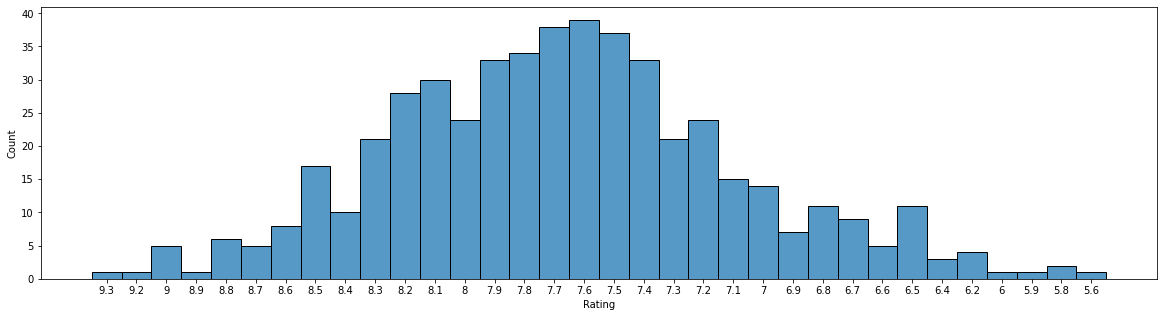

In [153]:
plt.figure(figsize=(20,5))

sns.histplot(
    data= result,
    x= result.Rating
)

<Axes: ylabel='Genre'>

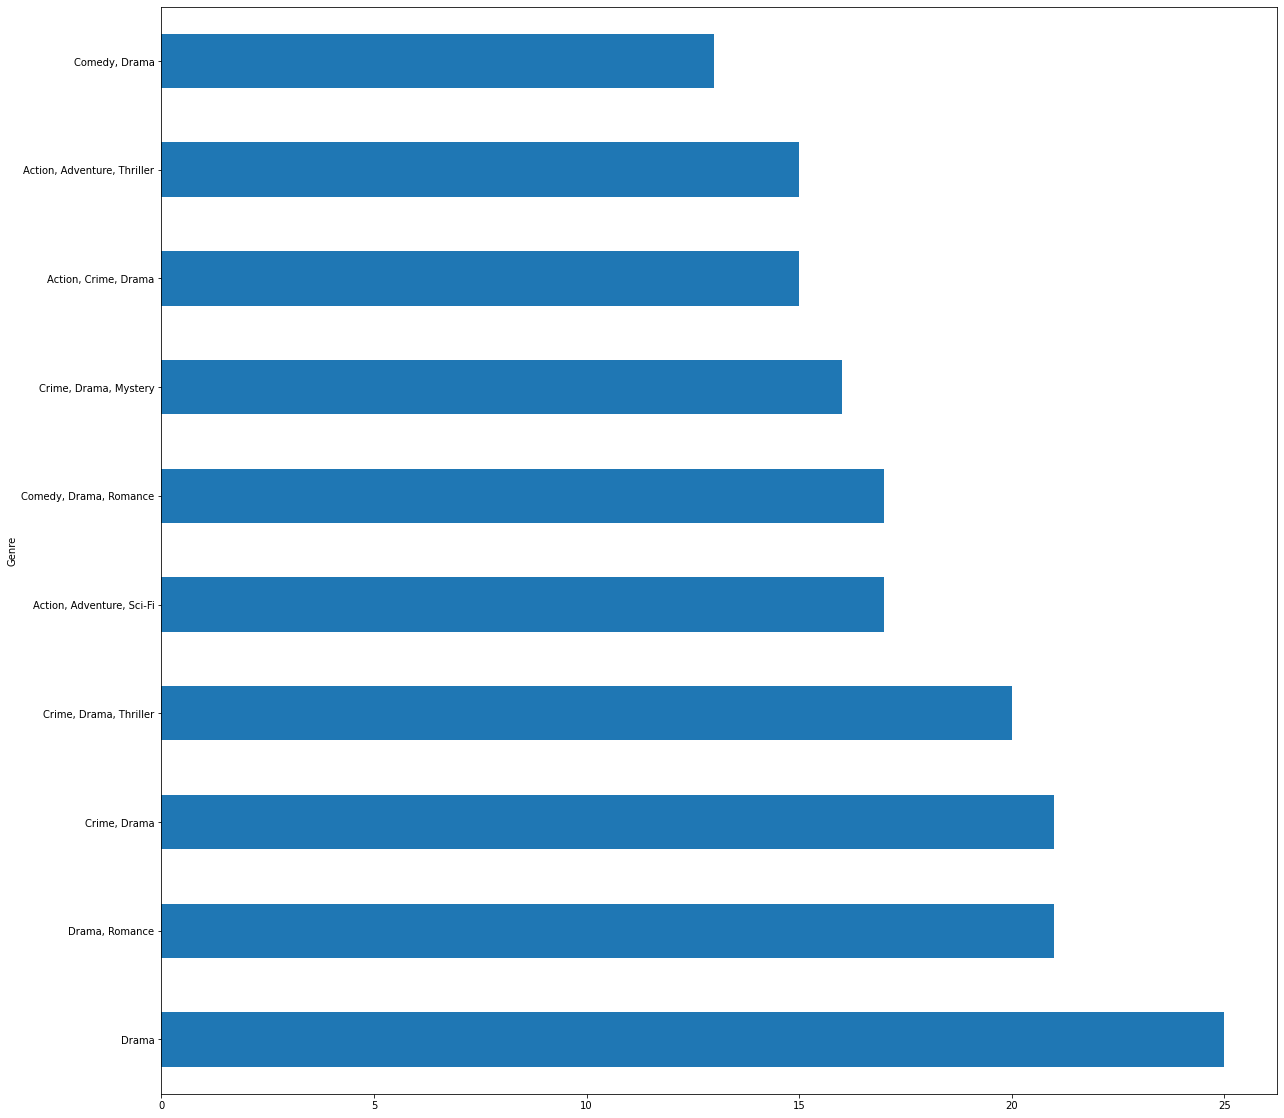

In [169]:
plt.figure(figsize=(20,20))


top10 = result.Genre.value_counts().nlargest(10)
top10

top10.plot(kind = 'barh')

<Axes: >

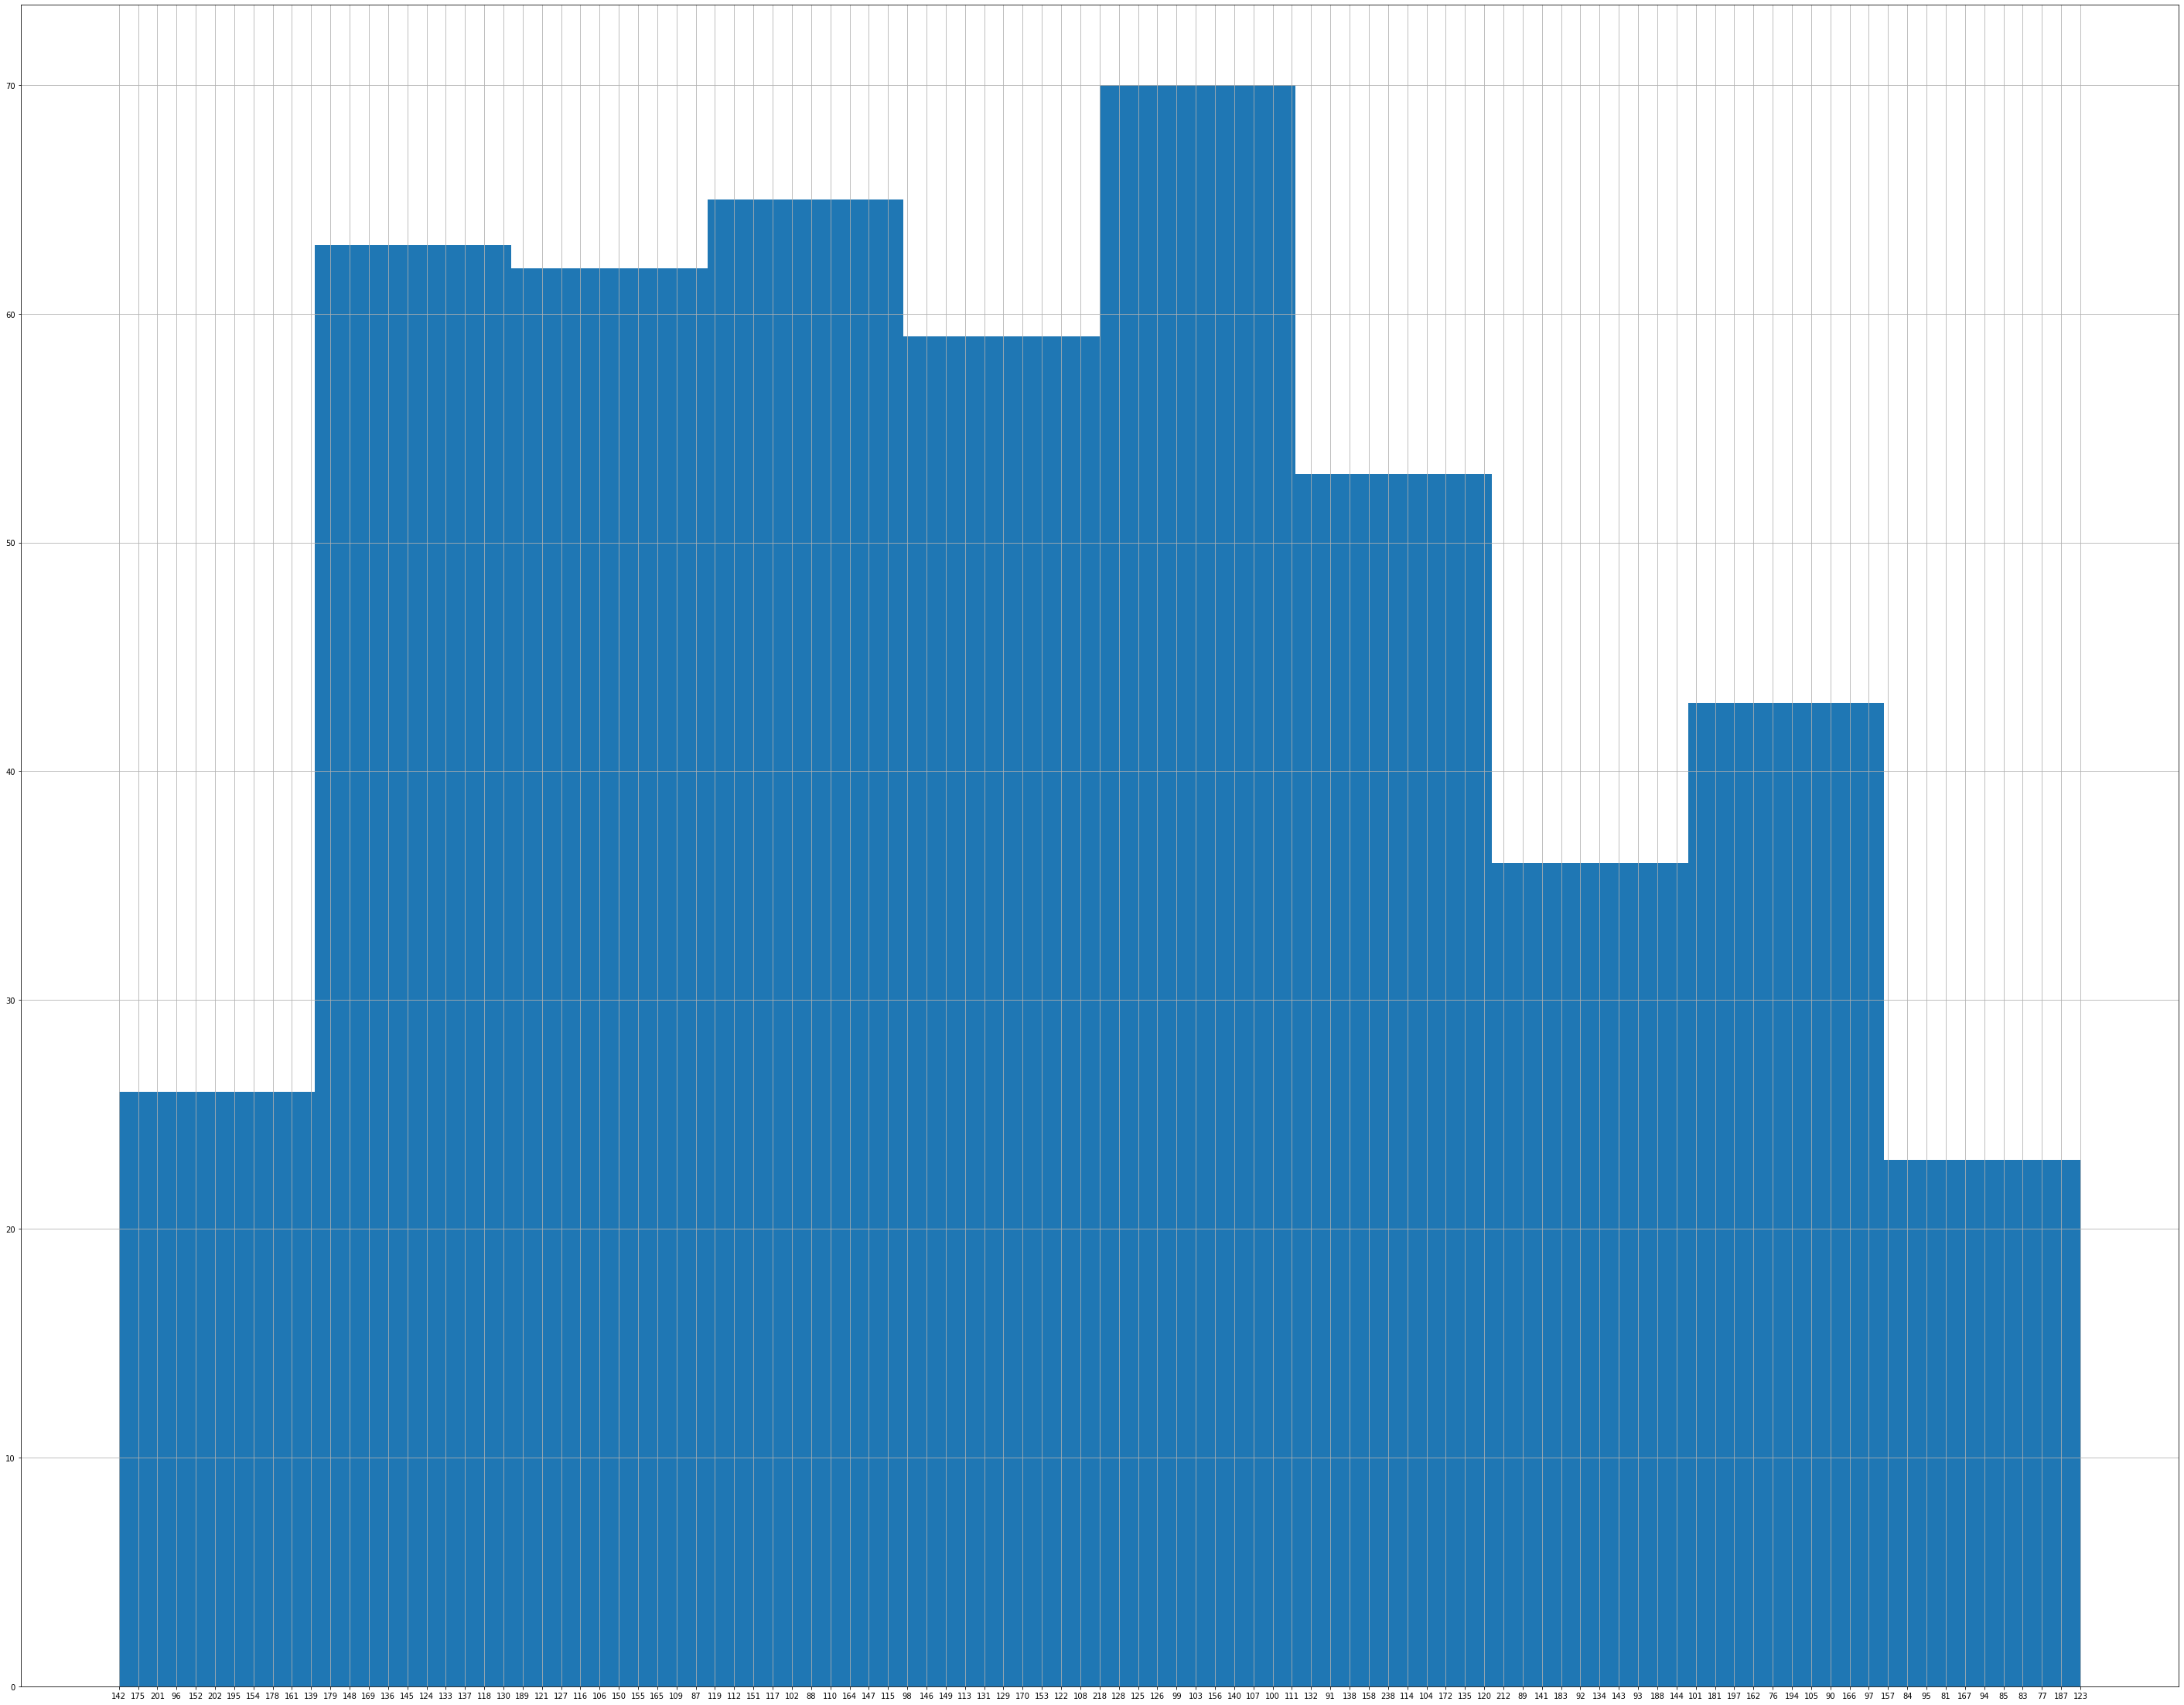

In [188]:
plt.figure(figsize=(50,40))


result['Runtime (in min)'].hist()

In [189]:
result.to_csv('top500.csv', index = False)